## Classification analysis on Wine data

In [11]:
from sklearn.datasets import load_wine

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [13]:
# Data loaded from sklearn is in form of dictionary
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

### Desciption of dataset
- Attributes information
- Classification catogies(Target variable)
- History/Origin of data

In [14]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## EDA

In [15]:
# Transforming data into pandas dataframe
wine_df = pd.DataFrame(wine['data'], columns=wine['feature_names'])
print(wine_df.head(),end='\n\n\n\n')
print(wine_df.info())
print("\n\n\n\n Data description: \n",wine_df.describe())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

## Data Transformation 
- Creating a new colum Class which is the target with values 0,1,2

In [16]:
wine_df['Class'] = pd.Categorical(wine['target'])
print(wine_df.head())
print("\n\n Columns: \n",wine_df.columns)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline Class  
0            

## Visualization

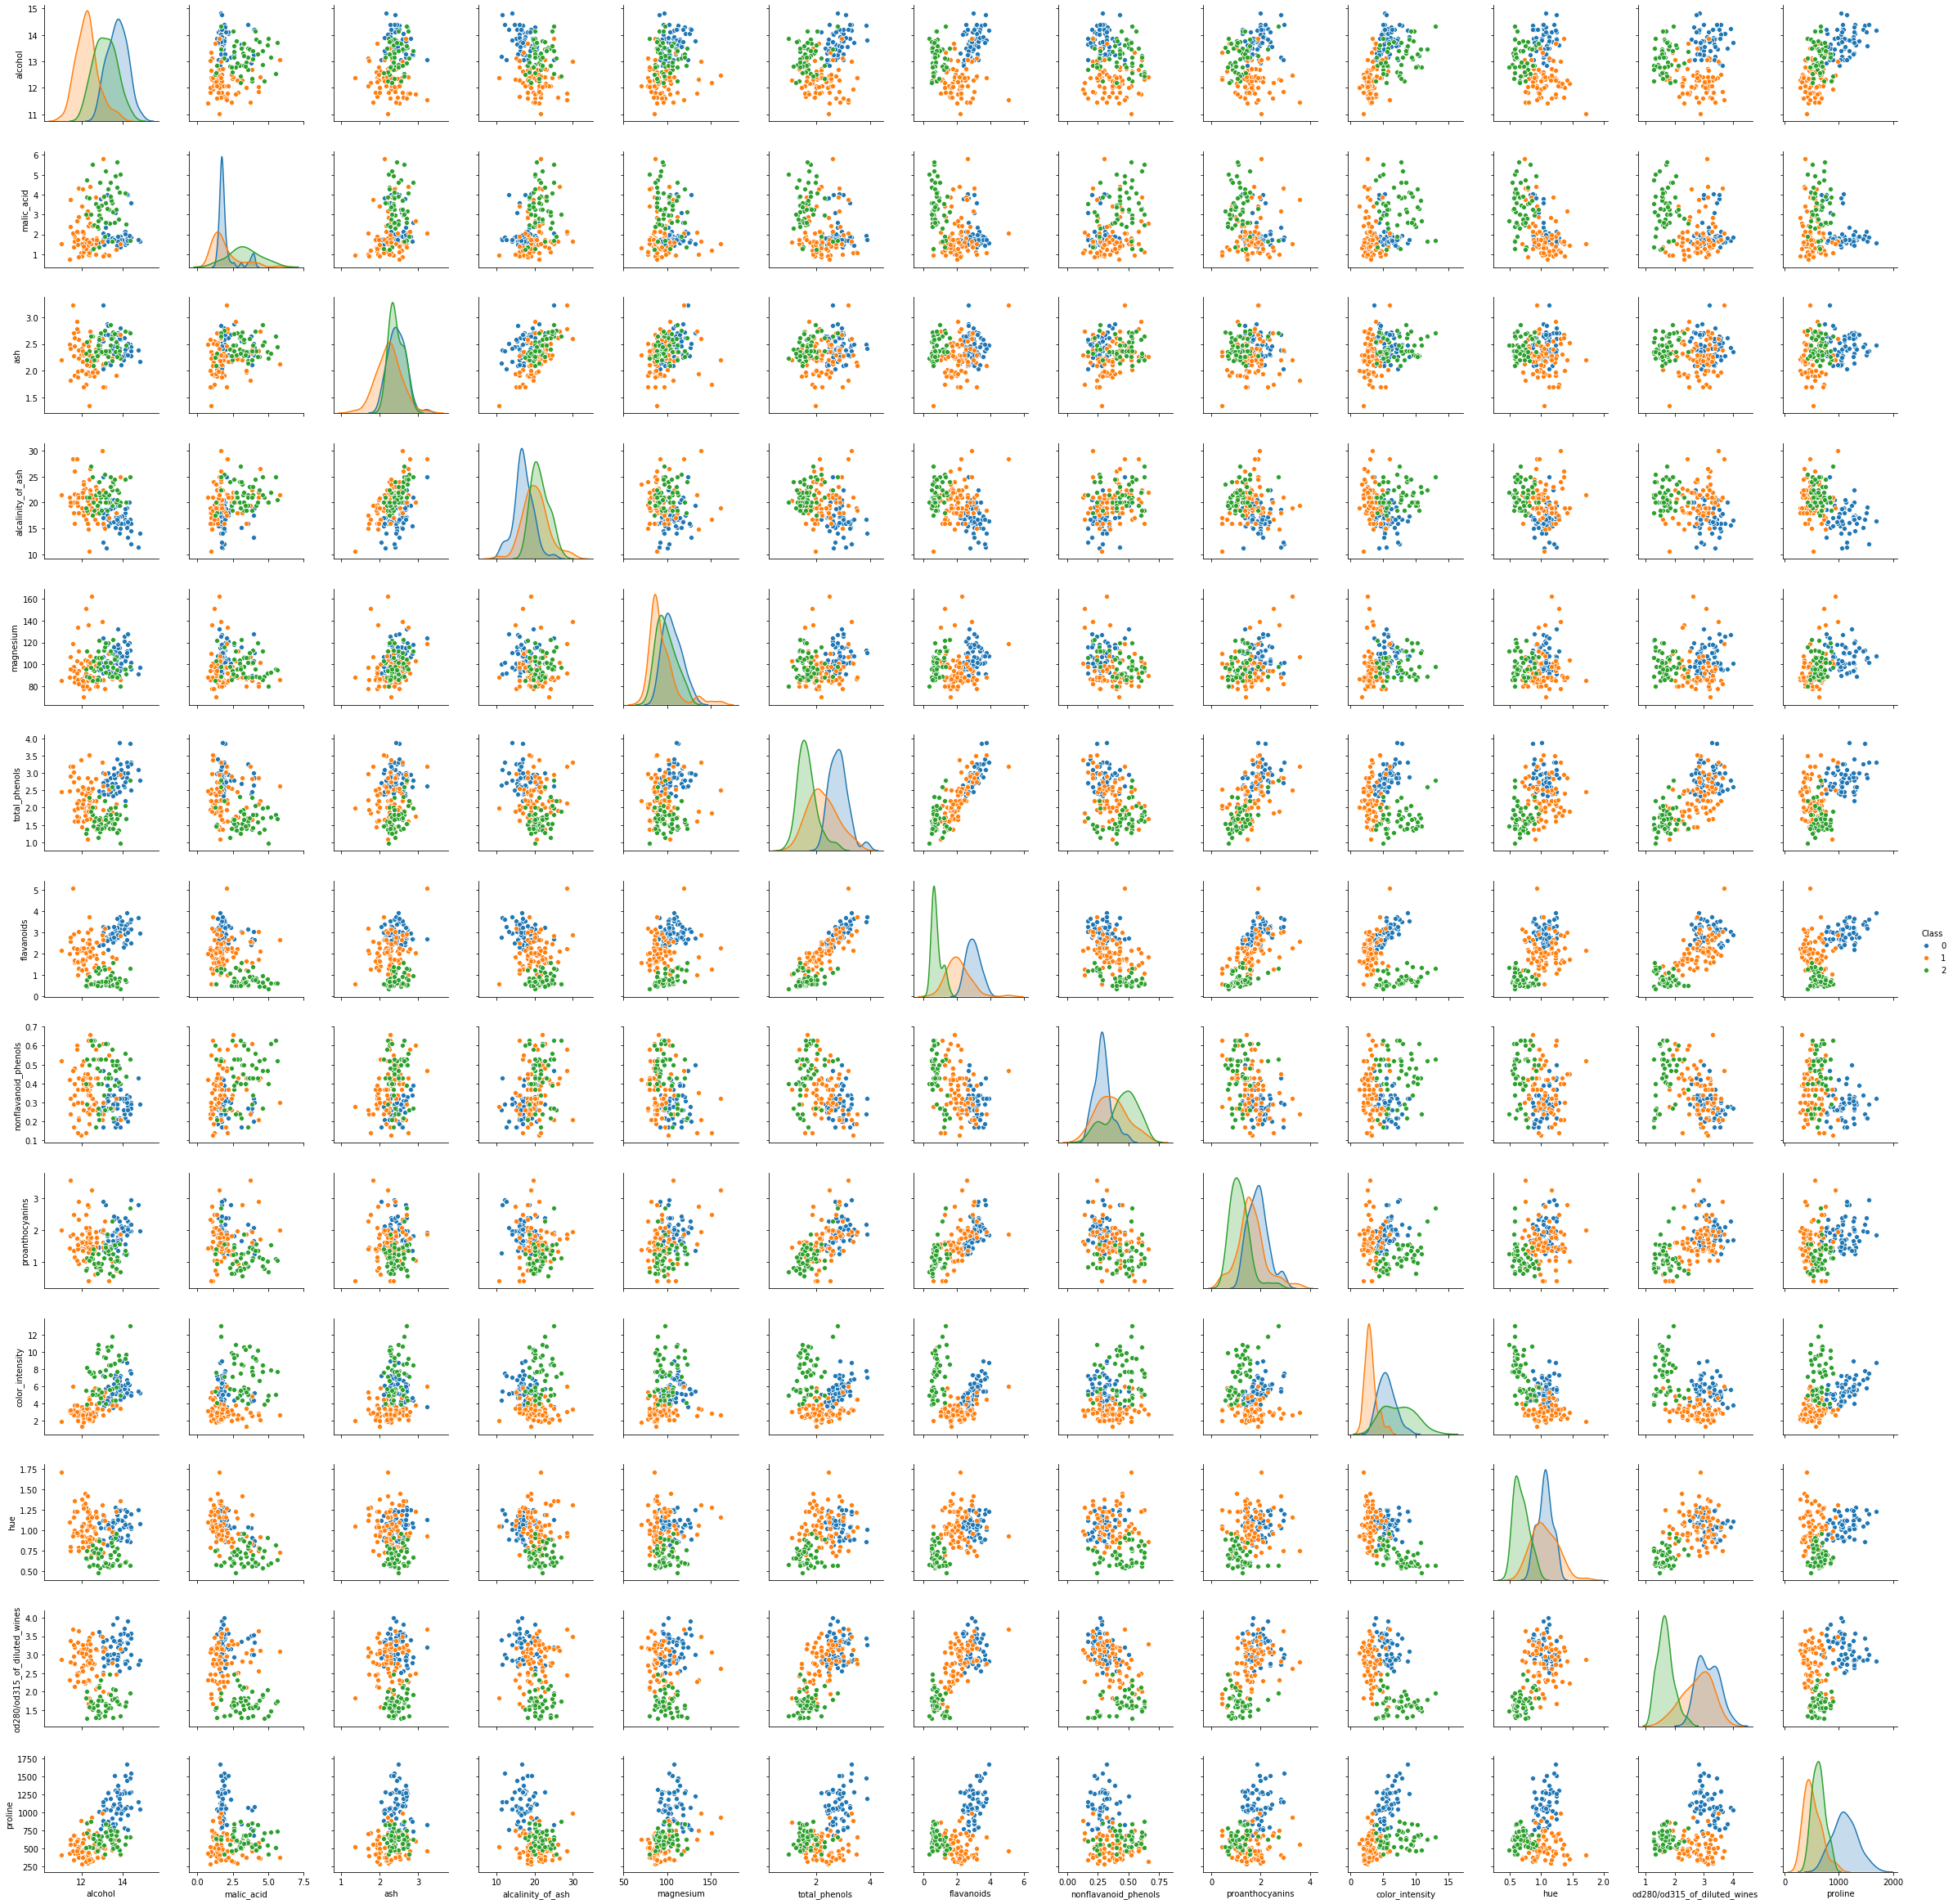

In [17]:
sns.pairplot(wine_df, hue='Class',vars=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'])

## Data Preparation

In [18]:
x_train, x_test = train_test_split(wine_df, test_size=0.2)
x_test

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
113,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.080000,1.100,2.31,434.0,1
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.100000,0.610,1.33,425.0,2
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.380000,1.360,3.16,410.0,1
84,11.84,0.89,2.58,18.0,94.0,2.20,2.21,0.22,2.35,3.050000,0.790,3.08,520.0,1
11,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.000000,1.170,2.82,1280.0,0
80,12.00,0.92,2.00,19.0,86.0,2.42,2.26,0.30,1.43,2.500000,1.380,3.12,278.0,1
108,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.700000,0.860,3.02,312.0,1
22,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.800000,1.110,4.00,1035.0,0
104,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.940000,1.040,3.57,672.0,1
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.700000,1.180,2.69,1020.0,0


## Model Building
- Fitting the data is when we decide our dependent and independent variables i.e x_train.iloc[:,:-2], x_train.iloc[:,-1], All columns until -2 are independent and last one is dependent
- Logistic Regression

In [19]:
log_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=500)
log_reg.fit(x_train.iloc[:,:-2], x_train.iloc[:,-1])


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
svm = LinearSVC(max_iter=100)
svm.fit(x_train.iloc[:,:-2], x_train.iloc[:,-1])

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [21]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train.iloc[:,:-2], x_train.iloc[:,-1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Prediciting the model

In [22]:
predict = log_reg.predict(x_test.iloc[:,:-2])
predict_svm = svm.predict(x_test.iloc[:,:-2])
predict_dt = decision_tree.predict(x_test.iloc[:,:-2])
print(predict[12])
print(predict_svm[12])
print(predict_dt[12])

1
1
1


- Anthor way for prediciton

In [23]:
#predict = log_reg.predict([12,134,142..])

## Model evaluation for logistic

In [24]:
print("Accuracy score: ", accuracy_score(x_test['Class'], predict))
print("Confusion matrix \n",confusion_matrix(x_test['Class'], predict, labels=[0,1,2]))
print("Precision score: ",precision_score(x_test['Class'], predict, average='macro'))
print("Recall score: ",recall_score(x_test['Class'], predict, average='macro'))
print("F1 score: ",f1_score(x_test['Class'], predict, average='macro'))

Accuracy score:  0.9444444444444444
Confusion matrix 
 [[ 7  1  0]
 [ 1 18  0]
 [ 0  0  9]]
Precision score:  0.9407894736842105
Recall score:  0.9407894736842105
F1 score:  0.9407894736842105


## Model evaluation for SVM

In [25]:
print("Accuracy score: ", accuracy_score(x_test['Class'], predict_svm))
print("Confusion matrix \n",confusion_matrix(x_test['Class'], predict_svm, labels=[0,1,2]))
print("Precision score: ",precision_score(x_test['Class'], predict_svm, average='macro'))
print("Recall score: ",recall_score(x_test['Class'], predict_svm, average='macro'))
print("F1 score: ",f1_score(x_test['Class'], predict_svm, average='macro'))

Accuracy score:  0.8611111111111112
Confusion matrix 
 [[ 8  0  0]
 [ 2 14  3]
 [ 0  0  9]]
Precision score:  0.85
Recall score:  0.912280701754386
F1 score:  0.8648388648388649


## Classification reports
- Single function can be used instead of using multiple functions used above for model evaluation

In [26]:
print("SVM \n\n",classification_report(x_test['Class'], predict_svm))
print("Logistic \n\n",classification_report(x_test['Class'], predict))
print("Decision tree \n\n",classification_report(x_test['Class'], predict_dt))

SVM 

               precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.74      0.85        19
           2       0.75      1.00      0.86         9

    accuracy                           0.86        36
   macro avg       0.85      0.91      0.86        36
weighted avg       0.89      0.86      0.86        36

Logistic 

               precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.95      0.95      0.95        19
           2       1.00      1.00      1.00         9

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.94      0.94      0.94        36

Decision tree 

               precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.88      0.74      0.80        19
           2       0.80      0.89      

In [30]:
#from sklearn import tree
#import graphviz

In [28]:
#tree_data = tree.export_graphviz(dtc)
#graph = gvz.Source(tree_data)
#graph.render('Wine')
#graph

In [33]:
#%pylab
#fig, (ax1,ax2) = plt.subplots(1,2,figsize(12,5))
#ax1.scatter(x_test['total_phenols'], x_test['proline'], c=x_test, cmap=cm.rainbow)
#ax2.scatter(x_test['total_phenols'], x_test['proline'], c=svm.predict(x_test.iloc[:,:-2]), cmap=cm.rainbow)

In [34]:
#plt.scatter(x_test['total_phenols'], x_test['proline'], c=x_test['Class'], cmap=cm.rainbow)

In [36]:
#plt.scatter(x_test['total_phenols'], x_test['proline'], c=svm.predict(x_test.iloc[:,:-2]), cmap=cm.rainbow)